#   
<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> Text Summarizer

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> loading libraries  

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re #, string, unicodedata
#from   bs4 import BeautifulSoup

#from   textblob  import TextBlob, Word
from   wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import spacy

#from sklearn.svm           import SVC
#from sklearn.naive_bayes   import MultinomialNB
#from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model  import LogisticRegression, SGDClassifier
from sklearn               import model_selection, preprocessing, naive_bayes, ensemble 
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics       import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
import nltk   # pip install --upgrade nltk

nltk.download('punkt')
from nltk.probability      import FreqDist
#from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize         import word_tokenize, sent_tokenize

nltk.download('stopwords') 
from nltk.corpus           import stopwords

nltk.download('wordnet')
from nltk.stem             import WordNetLemmatizer 

#from nltk.stem            import LancasterStemmer 
#from nltk.stem.porter     import PorterStemmer

[nltk_data] Downloading package punkt to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\EZ-
[nltk_data]     Tech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> loading dataset

In [3]:
with open('Story_4.txt', 'r') as file:
    text = file.read().strip().replace('\n',' ').replace(';','.').replace('-',' ').replace('_',' ')
    
Clean_Text = ''
for word in word_tokenize(text):
    Clean_Text = Clean_Text + ' ' + word
text = Clean_Text

text

" THE BOSCOMBE VALLEY MYSTERY . Arthur Conan Doyle . We were seated at breakfast one morning , my wife and I , when the maid brought in a telegram . It was from Sherlock Holmes and ran in this way : `` Have you a couple of days to spare ? Have just been wired for from the west of England in connection with Boscombe Valley tragedy . Shall be glad if you will come with me . Air and scenery perfect . Leave Paddington by the 11.15 . '' `` What do you say , dear ? '' said my wife , looking across at me . `` Will you go ? '' `` I really do n't know what to say . I have a fairly long list at present . '' `` Oh , Anstruther would do your work for you . You have been looking a little pale lately . I think that the change would do you good , and you are always so interested in Mr. Sherlock Holmes ' cases . '' `` I should be ungrateful if I were not , seeing what I gained through one of them , '' I answered . `` But if I am to go , I must pack at once , for I have only half an hour . '' My experi

In [4]:
data = pd.DataFrame( )
data['text'] = [text]
data.head()

,text
0,THE BOSCOMBE VALLEY MYSTERY . Arthur Conan Do...


#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> NLP Preprocessing

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove New Lines

In [5]:
# removing new lines
def remove_new_lines(text): return re.sub('[\n]',' ', text)
data['text'] = data['text'].apply(remove_new_lines)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Remove Punctuations

In [6]:
# removing punctuations
def remove_punctuations(text): return re.sub('[^a-zA-Z]',' ', text)
data['text'] = data['text'].apply(remove_punctuations)

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Converting to LowerCase

In [7]:
# converting text to lower_case
def into_lower(text): return text.lower()
data['text'] = data['text'].apply(into_lower)

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Set & Remove Stop_Words

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Setting Stop_Words

In [54]:
# Setting English StopWords
stop_words = set( stopwords.words('english') )
new_words  = [ 'should', 'would', 'could', 'might' 
             ] 
stop_words = stop_words.union(new_words)

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Iterate

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [55]:
def remove_stop_words(text):
    Clean = []
    for word in text.split():
        if word.strip() not in stop_words:
            Clean.append(word.strip()) 
    return ' '.join( Clean )

data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][:300]

'boscombe valley mystery arthur conan doyle seat breakfast one morning wife maid bring telegram sherlock holmes run way couple day spare wire west england connection boscombe valley tragedy shall glad come air scenery perfect leave paddington dear wife look across go really n know fairly long list pr'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Lemmatizing

In [56]:
# Lemmatizing 
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    Clean = []
    for word in text.split():
        w = word
        w = lemmatizer.lemmatize(w, pos="n")   # nouns
        w = lemmatizer.lemmatize(w, pos="v")   # verbs
        w = lemmatizer.lemmatize(w, pos="a")   # adj
        w = lemmatizer.lemmatize(w, pos="r")   # adv
        w = lemmatizer.lemmatize(w, pos="s")   # satellite adj
        Clean.append( w )
    return ' '.join( Clean )

data['text'] = data['text'].apply(lemmatize_text)
data['text'][0][:300]

'boscombe valley mystery arthur conan doyle seat breakfast one morning wife maid bring telegram sherlock holmes run way couple day spare wire west england connection boscombe valley tragedy shall glad come air scenery perfect leave paddington dear wife look across go really n know fairly long list pr'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Stemming
 - Faster but less accurate than Lemmatizer

In [57]:
# Stemming
''' 
Stemmer = PorterStemmer()

def stem_text(text):
    Clean = []
    for word in text.split():
        Clean.append( Stemmer.stem(word) )
    return ' '.join( Clean )

data['text'] = data['text'].apply(stem_text)
data.head()
''' 
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.2em; color:#00b3e5;"> Removing Stop_Words

In [58]:
data['text'] = data['text'].apply( remove_stop_words )
data['text'][0][:300]

'boscombe valley mystery arthur conan doyle seat breakfast one morning wife maid bring telegram sherlock holmes run way couple day spare wire west england connection boscombe valley tragedy shall glad come air scenery perfect leave paddington dear wife look across go really n know fairly long list pr'

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (List)

In [59]:
def bag_of_words_maker(df,ft):
    texts = df[ft]
    bag   = []
    for text in texts:
        for word in text.split():
            bag.append( word )
    return bag

bag_of_words = bag_of_words_maker( data, 'text' )
bag_of_words[:5]

['boscombe', 'valley', 'mystery', 'arthur', 'conan']

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Bag of Words (DataFrame)

In [60]:
bag_of_words = pd.DataFrame( bag_of_words, columns=['word'] )
bag_of_words.head(5)

,word
0,boscombe
1,valley
2,mystery
3,arthur
4,conan


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Words Count (DataFrame)

In [61]:
words_count         = pd.DataFrame( bag_of_words[ 'word' ].value_counts() )
words_count['word'] = words_count.index
words_count.index   = range( words_count.shape[0] )
words_count.head(15)

,count,word
0,47,holmes
1,45,man
2,40,know
3,40,see
4,40,mccarthy
5,33,father
6,32,one
7,28,son
8,27,go
9,27,come


<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Visualizing Top Words

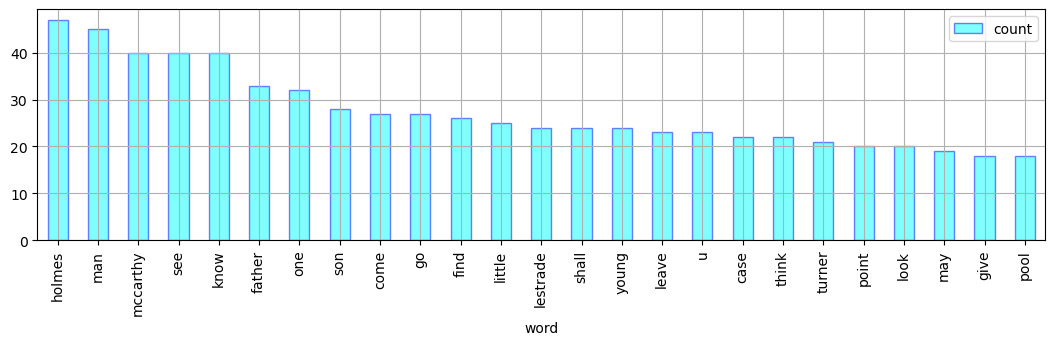

In [62]:
df = words_count
cat, sclr = 'word', 'count'

df.groupby(by=[cat])[sclr].median().reset_index().sort_values([sclr],ascending=False).head(25).\
plot( x=cat, y=sclr, kind='bar',  figsize=(13,3), color='cyan', edgecolor='blue', alpha=0.5, grid='on' ); plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> new stop words

In [63]:
new_stop_words  = [ 'say', 'upon', 'well', 'mr', 'good', 'enough', 'yes', 'sir'
                  ] 
stop_words = stop_words.union( new_stop_words )

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Re-Iterate

#####   

#####   

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> Keeping Top Words

In [64]:
'''
n = 3000
Top_Words = words_count.loc[:n,'word'].tolist()
Top_Words[:5]
'''
pass

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Text Reduction

In [65]:
'''
def text_reduct( text ):
    Clean = []
    for word in text.split():
        if word in Top_Words:
            Clean.append(word)
    return ' '.join(Clean)

data['text'] = data['text'].apply(text_reduct)
#data['text'][0]
'''
pass

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Cool Image of Top Phrases

In [66]:
df = pd.DataFrame( )
df['text'] = [text]
df['text'] = df['text'].apply(remove_new_lines)
#df['text'] = df['text'].apply(remove_punctuations)
df['text'] = df['text'].apply(into_lower)

vec=CountVectorizer( min_df=0, max_df=500, binary=False, ngram_range=(2,4) ).fit( df['text'] )
bag=vec.transform(data['text'])

s = bag.sum(axis=0)
f = [ (word,s[0,idx]) for word, idx in vec.vocabulary_.items() ]
f = sorted( f, key=lambda x: x[1], reverse=True )
f[:50]

[('sherlock holmes', 10),
 ('boscombe pool', 10),
 ('young mccarthy', 10),
 ('young man', 8),
 ('hatherley farm', 7),
 ('miss turner', 6),
 ('boscombe valley', 5),
 ('lodge keeper', 5),
 ('old man', 5),
 ('game keeper', 4),
 ('cry cooee', 4),
 ('william crowder', 3),
 ('crowder game', 3),
 ('question whether', 3),
 ('god help', 3),
 ('turner daughter', 3),
 ('indian cigar', 3),
 ('man mccarthy', 3),
 ('william crowder game', 3),
 ('crowder game keeper', 3),
 ('william crowder game keeper', 3),
 ('john turner', 2),
 ('right hand', 2),
 ('dead body', 2),
 ('blunt weapon', 2),
 ('butt end', 2),
 ('circumstantial evidence', 2),
 ('interest lestrade', 2),
 ('obvious fact', 2),
 ('many men', 2),
 ('coroner understand', 2),
 ('scotland yard', 2),
 ('shall use', 2),
 ('absolutely true', 2),
 ('hand man', 2),
 ('rent free', 2),
 ('one fact', 2),
 ('long time', 2),
 ('write little', 2),
 ('drive back', 2),
 ('grey cloak', 2),
 ('cigar holder', 2),
 ('blunt pen', 2),
 ('pen knife', 2),
 ('old tur

In [67]:
Top_N = 12
Top_Phrases = pd.DataFrame(f[:Top_N], columns=['Word','Freq'])
Freq_Max = Top_Phrases.loc[0,'Freq']
Top_Phrases.head()

,Word,Freq
0,sherlock holmes,10
1,boscombe pool,10
2,young mccarthy,10
3,young man,8
4,hatherley farm,7


In [68]:
Top_Corpus = []
for w in Top_Phrases['Word']:
    try:
        w1,w2,w3,w4 = w.split()
        Top_Corpus.append(str(w1+'_'+w2+'_'+w3+'_'+w4))
    except:
        try:
            w1,w2,w3 = w.split()
            Top_Corpus.append(str(w1+'_'+w2+'_'+w3))
        except:
            try:
                w1,w2 = w.split()
                Top_Corpus.append(str(w1+'_'+w2))
            except:
                Top_Corpus.append(str(w))
Top_Corpus = ' '.join(Top_Corpus)
Top_Corpus

'sherlock_holmes boscombe_pool young_mccarthy young_man hatherley_farm miss_turner boscombe_valley lodge_keeper old_man game_keeper cry_cooee william_crowder'

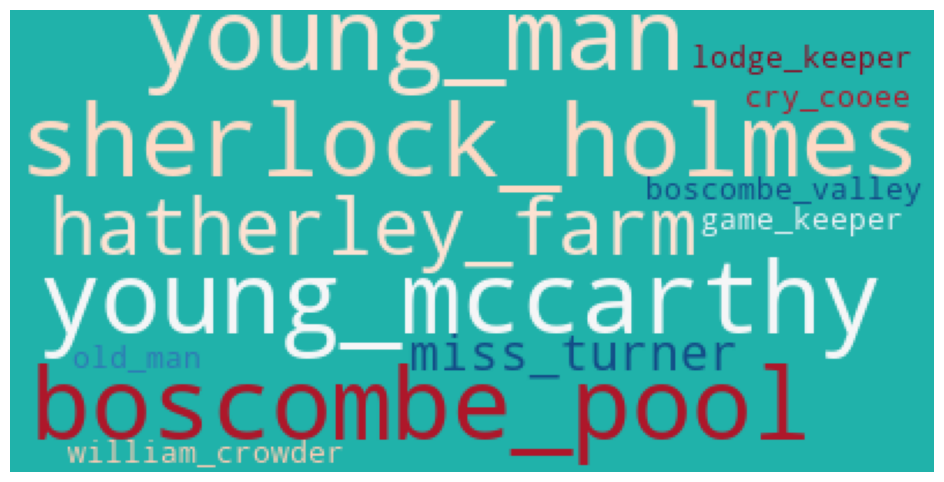

In [69]:
wordcloud = WordCloud( 
    
    background_color='LightSeaGreen', colormap='RdBu',
    #background_color='black', colormap='Greens',
    #background_color='black', colormap='Blues',
    
    stopwords        = stop_words,
    max_words        = Top_N,
    max_font_size    = 50,
    random_state     = 7 
    ).generate( str(Top_Corpus) ) 

fig = plt.figure(figsize=(13,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#####   

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:deeppink;"> TOP WORDS

In [70]:
# input
MIN_Repeat = 2   # minimum number of appearances in text

# auto
TOP_WORDS = []
for w in f:
    if w[1] >= MIN_Repeat:
        try:
            w1,w2,w3, w4 = w[0].split( )
            TOP_WORDS.append( w1 )
            TOP_WORDS.append( w2 )
            TOP_WORDS.append( w3 )
            TOP_WORDS.append( w4 )
        except:
            try:
                w1,w2,w3 = w[0].split( )
                TOP_WORDS.append( w1 )
                TOP_WORDS.append( w2 )
                TOP_WORDS.append( w3 )
            except:
                w1,w2 = w[0].split( )
                TOP_WORDS.append( w1 )
                TOP_WORDS.append( w2 )            
TOP_WORDS = list( set( TOP_WORDS ))
TOP_WORDS.sort()
print( len(TOP_WORDS), 'TOP_WORDS:  ', TOP_WORDS )

71 TOP_WORDS:   ['absolutely', 'back', 'behind', 'blunt', 'body', 'boscombe', 'butt', 'cigar', 'circumstantial', 'cloak', 'come', 'cooee', 'coroner', 'crowder', 'cry', 'daughter', 'dead', 'drive', 'end', 'evidence', 'fact', 'farm', 'free', 'game', 'god', 'grey', 'hand', 'hatherley', 'help', 'holder', 'holmes', 'indian', 'interest', 'john', 'keeper', 'knife', 'lestrade', 'little', 'live', 'lodge', 'long', 'man', 'many', 'may', 'mccarthy', 'men', 'miss', 'obvious', 'old', 'one', 'pen', 'pool', 'question', 'rent', 'right', 'scotland', 'shall', 'sherlock', 'time', 'tree', 'true', 'turner', 'understand', 'use', 'valley', 'weapon', 'whether', 'william', 'write', 'yard', 'young']


#####   

In [71]:
MIN_REP = 10**10

for i in words_count.index:
    if words_count.loc[i,'count']>= MIN_REP:
        w = words_count.loc[i,'word'] 
        TOP_WORDS.append( w )           
TOP_WORDS = list( set( TOP_WORDS ))
TOP_WORDS.sort()
print( len(TOP_WORDS), 'TOP_WORDS:  ', TOP_WORDS )

71 TOP_WORDS:   ['absolutely', 'back', 'behind', 'blunt', 'body', 'boscombe', 'butt', 'cigar', 'circumstantial', 'cloak', 'come', 'cooee', 'coroner', 'crowder', 'cry', 'daughter', 'dead', 'drive', 'end', 'evidence', 'fact', 'farm', 'free', 'game', 'god', 'grey', 'hand', 'hatherley', 'help', 'holder', 'holmes', 'indian', 'interest', 'john', 'keeper', 'knife', 'lestrade', 'little', 'live', 'lodge', 'long', 'man', 'many', 'may', 'mccarthy', 'men', 'miss', 'obvious', 'old', 'one', 'pen', 'pool', 'question', 'rent', 'right', 'scotland', 'shall', 'sherlock', 'time', 'tree', 'true', 'turner', 'understand', 'use', 'valley', 'weapon', 'whether', 'william', 'write', 'yard', 'young']


#####   

#####      
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Summary

In [72]:
# input
num_sentences = 27

# Calculate word frequencies
fdist = FreqDist( TOP_WORDS )

for i in words_count.index:
    w = words_count.loc[ i, 'word' ]
    if w in TOP_WORDS:
        freq = words_count.loc[ i, 'count' ]
        freq = min( Freq_Max, freq )
        fdist[ w ] = freq

# Assign scores to sentences based on word frequencies
sentences       = sent_tokenize( text )
sentence_scores = [ sum(fdist[word] for word in word_tokenize(
    lemmatizer.lemmatize( 
        lemmatizer.lemmatize( 
            lemmatizer.lemmatize( 
                lemmatizer.lemmatize( 
                    lemmatizer.lemmatize( sentence.lower()
                                        , pos="n" ), pos="v" ), pos="a" ), pos="r" ), pos="s" )
) if word in fdist) for sentence in sentences]


# Create a list of tuples containing sentence index and score
sentence_scores = list(enumerate(sentence_scores))

# Sort sentences by scores in descending order
sorted_sentences = sorted(sentence_scores, key=lambda x: x[1], reverse=True)

# Choosing top `num_sentences` sentences for the summary
chosen_sentences = sorted_sentences[:num_sentences]

# Sort the randomly selected sentences based on their original order in the text
summary_sentences = sorted(chosen_sentences, key=lambda x: x[0])

# Create the summary
summary = '/     ...     /'.join([sentences[i] for i, _ in summary_sentences])
summary

"Sherlock Holmes was pacing up and down the platform , his tall , gaunt figure made even gaunter and taller by his long grey travelling cloak and close fitting cloth cap ./     ...     /McCarthy had one son , a lad of eighteen , and Turner had an only daughter of the same age , but neither of them had wives living ./     ...     /`` On June 3rd , that is , on Monday last , McCarthy left his house at Hatherley about three in the afternoon and walked down to the Boscombe Pool , which is a small lake formed by the spreading out of the stream which runs down the Boscombe Valley ./     ...     /`` From Hatherley Farm house to the Boscombe Pool is a quarter of a mile , and two people saw him as he passed over this ground ./     ...     /One was an old woman , whose name is not mentioned , and the other was William Crowder , a game keeper in the employ of Mr. Turner ./     ...     /The game keeper adds that within a few minutes of his seeing Mr. McCarthy pass he had seen his son , Mr. James M

#####   

#####   